# CAT Vs Dog

## 1. Base Model 생성

- 데이터 준비

In [1]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_dir = 'data/cats_and_dogs/train'
validation_dir = 'data/cats_and_dogs/validation'
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Using TensorFlow backend.


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [2]:
for data_batch, labels_batch in train_generator:
    print('배치 데이터 크기:', data_batch.shape)
    print('배치 레이블 크기:', labels_batch.shape)
    break

배치 데이터 크기: (20, 150, 150, 3)
배치 레이블 크기: (20,)


- 모델 정의

In [3]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)      

- 모델 시각화

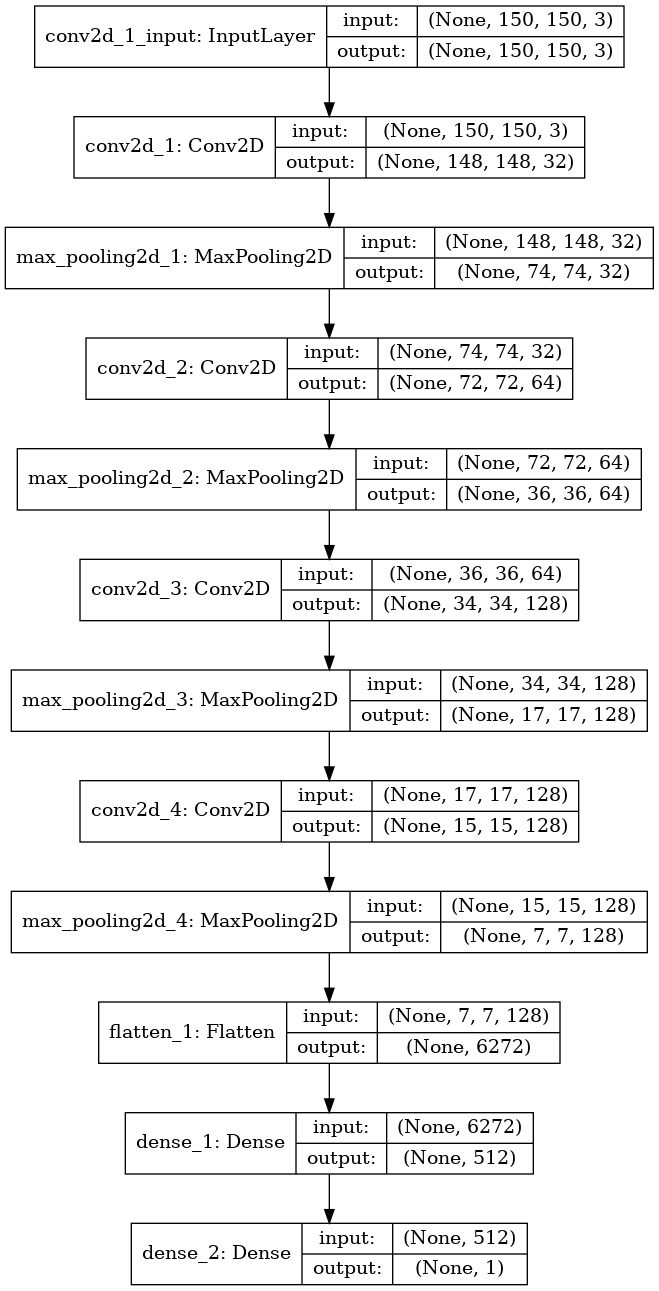

In [4]:
from keras.utils import plot_model
plot_model(model, show_shapes=True)

- 컴파일

In [5]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.0001),
              metrics=['accuracy'])

- 모델 학습

In [6]:
history = model.fit_generator(train_generator, 
                              steps_per_epoch=100, 
                              epochs=30, validation_data=validation_generator,
                              validation_steps=50)

Epoch 1/30
100/100 [==============================] - 5s 50ms/step - loss: 0.6910 - accuracy: 0.5480 - val_loss: 0.6763 - val_accuracy: 0.5930
Epoch 2/30
100/100 [==============================] - 4s 38ms/step - loss: 0.6580 - accuracy: 0.6150 - val_loss: 0.5883 - val_accuracy: 0.6260
Epoch 3/30
100/100 [==============================] - 4s 37ms/step - loss: 0.6081 - accuracy: 0.6710 - val_loss: 0.6172 - val_accuracy: 0.5940
Epoch 4/30
100/100 [==============================] - 4s 37ms/step - loss: 0.5651 - accuracy: 0.7095 - val_loss: 0.5306 - val_accuracy: 0.6910
Epoch 5/30
100/100 [==============================] - 4s 37ms/step - loss: 0.5268 - accuracy: 0.7360 - val_loss: 0.6937 - val_accuracy: 0.6640
Epoch 6/30
100/100 [==============================] - 4s 37ms/step - loss: 0.4979 - accuracy: 0.7590 - val_loss: 0.6652 - val_accuracy: 0.7070
Epoch 7/30
100/100 [==============================] - 4s 38ms/step - loss: 0.4775 - accuracy: 0.7735 - val_loss: 0.6059 - val_accuracy: 0.7190

- 모델 저장

In [7]:
model.save('cats_and_dogs_small_1.h5')

/usr/local/lib/python3.6/dist-packages/keras/engine/saving.py:165: UserWarning: TensorFlow optimizers do not make it possible to access optimizer attributes or optimizer state after instantiation. As a result, we cannot save the optimizer as part of the model save file.You will have to compile your model again after loading it. Prefer using a Keras optimizer instead (see keras.io/optimizers).
  'TensorFlow optimizers do not '


- 성능평가 시각화

In [8]:
import matplotlib.pyplot as plt

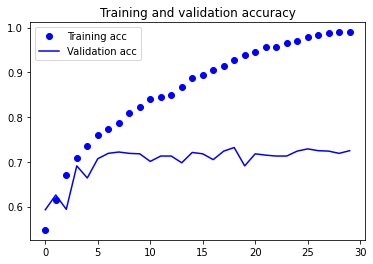

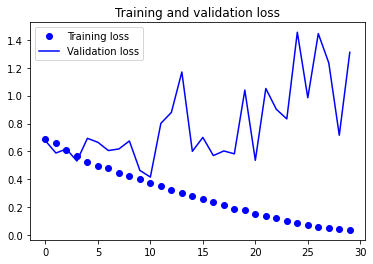

In [9]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()